<h1> Data Analysis Process

### Create a function to load multiple CSV files

In [1]:
import unicodecsv

def read_csv(filename):
    with open (filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [2]:
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [3]:
daily_engagement[0]

{'acct': '0',
 'utc_date': '2015-01-09',
 'num_courses_visited': '1.0',
 'total_minutes_visited': '11.6793745',
 'lessons_completed': '0.0',
 'projects_completed': '0.0'}

In [4]:
project_submissions[0]

{'creation_date': '2015-01-14',
 'completion_date': '2015-01-16',
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

<h1> Fixing Data Types

In [5]:
from datetime import datetime as dt

# "parse_date" function takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# "parse_maybe_int" function takes a string which is either an empty string or represents an integer,
# and returns an int or None.

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)


# Clean up the data types in the enrollments table

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [6]:
# Clean up the data types in the engagement table

for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [7]:
# Clean up the data types in the submissions table

for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

<h2> Question Phase

Some questions that can be derived from the datasets:

1. How long to submit projects?
2. How do students who pass their projects differ from those who don't?
3. How much time students spend taking classes?
4. How time spent relates to lesson/projects completed?
5. How student engagement changes overtime?
6. How many times students submit projects before they pass? Does this differ for every projects?

<h1>Investigating the Data

Now you've started the data wrangling process by loading the data and making sure it's in a good format, the next step is to investigate a bit and see if there are any inconsistencies or problems in the data that you'll need to clean up.

For each of the three files you've loaded, find the total number of rows in the csv and the number of unique students. To find the number of unique students in each table, you might want to try creating a set of the account keys.

In [8]:
## Find the total number of rows and the number of unique students (account keys)
## in each table.

In [9]:
#Rename 'acct' column in daily_engagement to 'account_key'

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

After running the above code, Caroline also shows rewriting the solution from the previous exercise to the following code:

In [15]:
#Find the number of unique students (account keys)

def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [14]:
print('Total number of rows in enrollments:', (len(enrollments)))

unique_enrolled_students = get_unique_students(enrollments)

print('Total number of unique students in enrollments:', (len(unique_enrolled_students)))

Total number of rows in enrollments: 1640
Total number of unique students in enrollments: 1302


In [17]:
print('Total number of rows in daily engagement:', (len(daily_engagement)))

unique_engagement_students = get_unique_students(daily_engagement)

print('Total number of unique students in daily engagement:', (len(unique_engagement_students)))

Total number of rows in daily engagement: 136240
Total number of unique students in daily engagement: 1237


In [19]:
print('Total number of rows in project submissions:', (len(project_submissions)))

unique_project_submitters = get_unique_students(project_submissions)

print('Total number of unique students in project submissions:', (len(unique_project_submitters)))

Total number of rows in project submissions: 3642
Total number of unique students in project submissions: 743


## Missing Engagement Records

There are more unique students in enrollment than engagement table.

Why are students missing from daily_engagement?
1. Identify surprising data points?
 - Any enrollment record with corresponding engagement data


2. Print out one or a few surprising data points


3. Fix any problems you find
 - More investigation may be necessary
 - Or there might not be a problem

In [21]:
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


In [22]:
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students \
            and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print(enrollment)
        
num_problem_students

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}


3

### We found that the accounts returned above are Udacity test accounts. This can be confirmed in the 'is_udacity': True

## Tracking Down the Remaining Problems

In [23]:
#Check how many Udacity test accounts are there

udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment ['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [54]:
#Create a function that removes Udacity test accounts

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [25]:
#Remove Udacity test accounts from each dataset
#Print the number of non_udacity accounts

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))


1622
135656
3634


## Refining the Question

<h3> Exploratory Data Analysis

<b>Question:</b>
How do numbers in the daily engagement table differ for students who pass the first project?

<b>Problems that we can encounter with this Q:</b>
1. This will include data from after the project submission. We only need to look at the data before first submission.
2. This compares data from different lengths of time. Comparing averages may be misleading.
3. Includes engagement in courses not related to the first project (not a show stopper)
 
<b>Revision:</b>
Only look at engagement from first week and exclude students who cancel within a week. (First 2 problems)

<b><i>Create a dictionary named paid_students containing all students who either haven't canceled yet or who remained enrolled for more than 7 days. The keys should be account keys, and the values should be the date the student enrolled.

In [26]:
#Create a new empty dictionary

paid_students = {}

#Loop through enrollment where there are no udacity accts

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']

#Same student can enroll multiple times and if that happens,
#we're just going to save an arbitrary one of those enrollment dates
#Only add date to the dictionary if the acct key was not already present 
#or this date is more recent than the one already present       
    
        if account_key not in paid_students or \
                enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date #account key as key and enrollment date as value
        
len(paid_students)

#Note that paid students may have canceled from other courses before paying, 
#and the suggested solution will retain records from these other enrollments.

995

<b>Getting Data from First Week<b>

In [27]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

#Before the "and" statement, we were only checking 
#the engagement date that came at most seven days after the joint date

#We're not checking that the engagement date actually came after the join date

#So for students who enroll once, then cancel, then enroll again later,
#everthing from the first enrollment will count as their frist week

#to fix this, we checked that at least zero days had passed from the join date
#to the engagement date, that way we're only considering data from the
#most recent enrollment which was our intention

In [28]:
#Create a function to remove any data points corresponding
#to students who canceled during the free trial

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [29]:
#Next, we called this function on each of the three tables and
#saved the results in new variables

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [30]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [55]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

#start as empty list
paid_engagement_in_first_week = []

#Loop over each record in the engagement table and
#saved the student's acct key in the account_key variable

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']

#look up student's join date using the dictionary we created earlier
    join_date = paid_students[account_key]

#save the date of the engagement record
    engagement_record_date = engagement_record['utc_date']

#check whether the two dates were within one week of each other    
#if so, append this record to the variable paid_engagement_in_first_week
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
len(paid_engagement_in_first_week)

6919

<b>Average Minutes Spend in Classroom During the First Week<b>

In [32]:
#Create a dictionary to group engagement data by acct key
#defaultdict allows us to specify a default value

from collections import defaultdict

engagement_by_account = defaultdict(list)

#loop through engagement record and saved the account key
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']

#lookup engagement record for that acct key
#then append this engagement record to the list of 
#engagement records for that account key
    engagement_by_account[account_key].append(engagement_record)

In [33]:
#Add up the number of minutes visited by each account and
#save in this dict
#will store a number for each acct key instead of 
#a list of engagement records

total_minutes_by_account = {}

#loop over the dict created previously and 
#by looping over the .items, we get both the key and 
#the value for each entry in the dict

for account_key, engagement_for_student in engagement_by_account.items():
#for each acct, the number of minutes starts at 0.
    total_minutes = 0

#loop over each engagement record in the list of engagement records
#for that student and add the number of minutes that student
#visited in that engagement record to the total number of
#minutes for the student
    
    for engagement_record in engagement_for_student: 
        total_minutes += engagement_record['total_minutes_visited']
        
#store that number if minutes under that account key in the new dict
    total_minutes_by_account[account_key] = total_minutes

In [34]:
#take the average of those totals
#for that, account keys are no longer relevant
#make it a list to avoid error

total_minutes = list(total_minutes_by_account.values())

import numpy as np

print('Mean:',np.mean(total_minutes))
print('Standard Deviation:',np.std(total_minutes))
print('Minimum:',np.min(total_minutes))
print('Maximum:',np.max(total_minutes))

#maximum is very large so something has gone wrong

Mean: 306.70832675342825
Standard Deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [35]:
#Initialize the student with the max minutes to be none and 
#max min spent to be zero


student_with_max_minutes = None
max_minutes = 0

#loop over each student and the num of mins they spent
#in the total minutes by acct dict
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:

#reset both the max num of minutes and the maximum student
#to be this num of minutes and this student
        max_minutes = total_minutes
        student_with_max_minutes = student
        
max_minutes        

3564.7332644989997

In [56]:
#print each engagement record for that student

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)
        
#there are more than 7 entries
#since we're only getting the first week data, it should not exceed 7 entries
#data points aren't falling in a one week time span either

{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 0, 'account_key': '

In [37]:
#Analyze lessons completed instead of minutes spent

#Group records by account key

from collections import defaultdict

#key_name is added as extra argument w/c would indicate the key to groupby

def group_data(data, key_name):

    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

#Call function below to create the same engagement by
#account dict that we had previously


engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [38]:
#Sum up all entries for each acct_key

def sum_grouped_items(grouped_data, field_name):

    summed_data = {}

    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
        
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


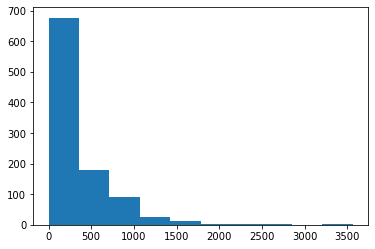

In [39]:
#Print summary statistics

import matplotlib.pyplot as plt

def describe_data(data):

    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data)

total_minutes = list(total_minutes_by_account.values())
describe_data(total_minutes)

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


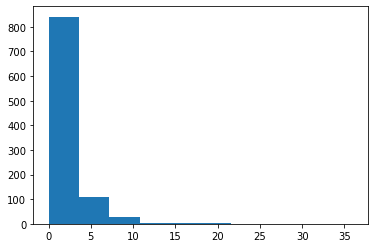

In [40]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

describe_data(list(lessons_completed_by_account.values()))

<b> Analyze the number of days the student visited the classroom:

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


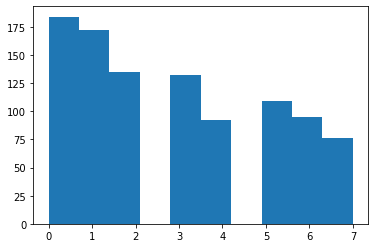

In [41]:
#Create new field named has_visited
#Added in the paid_engagement table

days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

describe_data(list(days_visited_by_account.values()))

<b> Splitting out Passing Students 

In [42]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

#Create a set of students who pass the subway project at some point

pass_subway_project = set()

#Loop over each submission in the paid_submissions table

for submission in paid_submissions:
    
#Pull out the project key and rating    
    
    project = submission['lesson_key']
    rating = submission['assigned_rating']

#Check if this project is in the list subway_project_lesson_keys
#Then check if the student passes the project so we add a 
#condition that rating is equal to pass or distinction
    
    if project in subway_project_lesson_keys and \
            (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
    
len(pass_subway_project)    

647

In [43]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


<b> Comparing the Two Student Groups

In [44]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')


<b> Total Minutes Visited

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


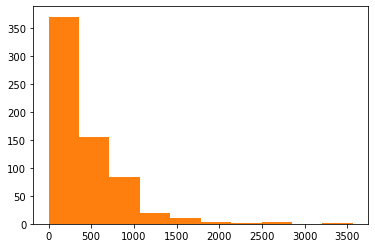

In [45]:
print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(list(non_passing_minutes.values()))

print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(list(passing_minutes.values()))

<b> Lessons Completed

non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


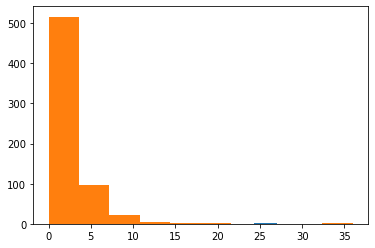

In [46]:
print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(list(non_passing_lessons.values()))

print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(list(passing_lessons.values()))

<b> Number of days the student visited the classroom:

non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7
passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


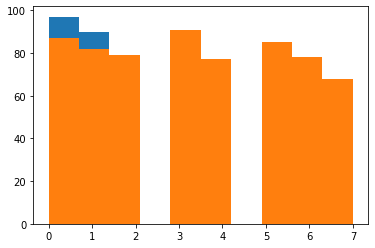

In [47]:
print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(list(non_passing_visits.values()))

print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(list(passing_visits.values()))

<h2> Histograms

Make a histogram of each of the three metrics we looked at for both students who pass the subway project and students who don't. That is, you should create 6 histograms. Do any of the metrics have histograms with very different shapes for students who pass the subway project vs. those who don't?

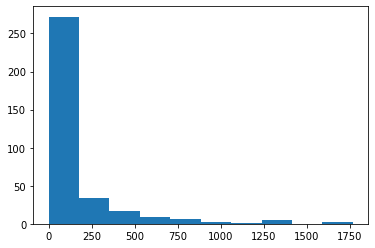

In [48]:
import matplotlib.pyplot as plt
plt.hist(non_passing_minutes.values())
plt.show()

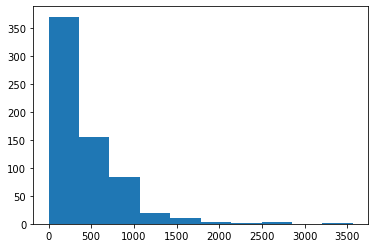

In [49]:
plt.hist(passing_minutes.values())
plt.show()

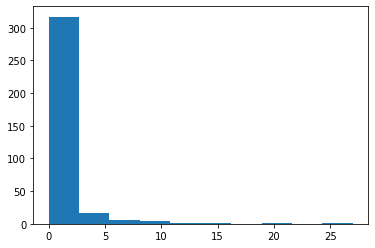

In [50]:
plt.hist(non_passing_lessons.values())
plt.show()

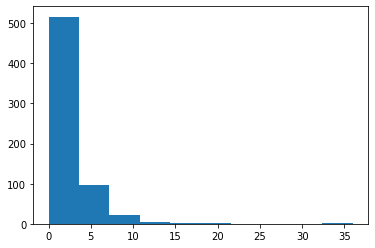

In [51]:
plt.hist(passing_lessons.values())
plt.show()

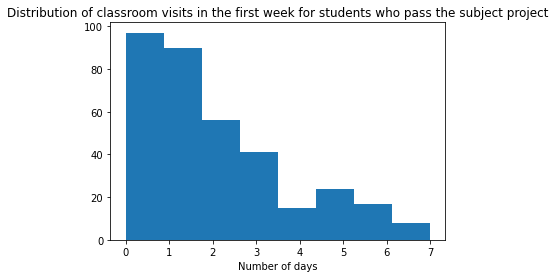

In [52]:
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week' +
         ' for students who pass the subject project')
plt.show()

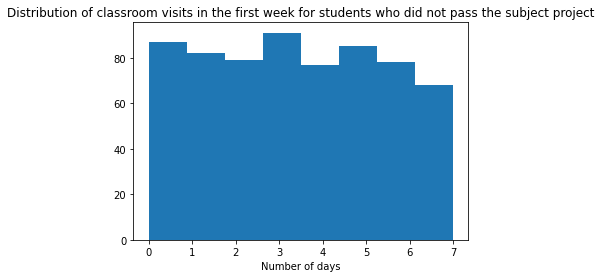

In [53]:
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week' +
         ' for students who did not pass the subject project')
plt.show()

<h2> Drawing Conclusions Phase

<b>Tentative Conclusion:</b> Students who pass the Subway project spend more minutes in the classroom during their first week.

But is it a true difference or due to the noise in the data?

<h2> Communication Phase

- What findings are most interesting?
<br>a. Difference in total minutes
<br>b. Difference in days visited
<br><br>
- How will you present them?
<br>a. Report average minutes
<br>b. Show histograms (polish any visualizations)

<h2> Data Analysis and Related Terms

<b>Data Science</b>
- Similar to data analysis
- More focused on building systems (recommendation system or ranking algorithm)
- May require more experience

<b>Data Engineering
- More focused on data wrangling
- Involves data storage and processing

<b>Big Data
- Fuzzy term for "a lot" of data
- Data analysts, scientists, and engineers can all work with big data    